In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images,train_labels,test_size=0.2,shuffle=True)

In [ ]:
train_images.shape

(50000, 3072)

In [ ]:
len(train_labels)

50000

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
test_images.shape

(10000, 3072)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels.shape

(10000, 1)

In [ ]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

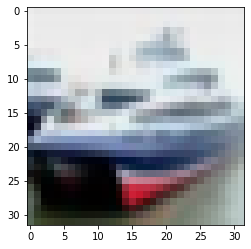

In [ ]:
import matplotlib.pyplot as plt
img = test_images[1]
plt.imshow(np.reshape(img, (32,32,3)))

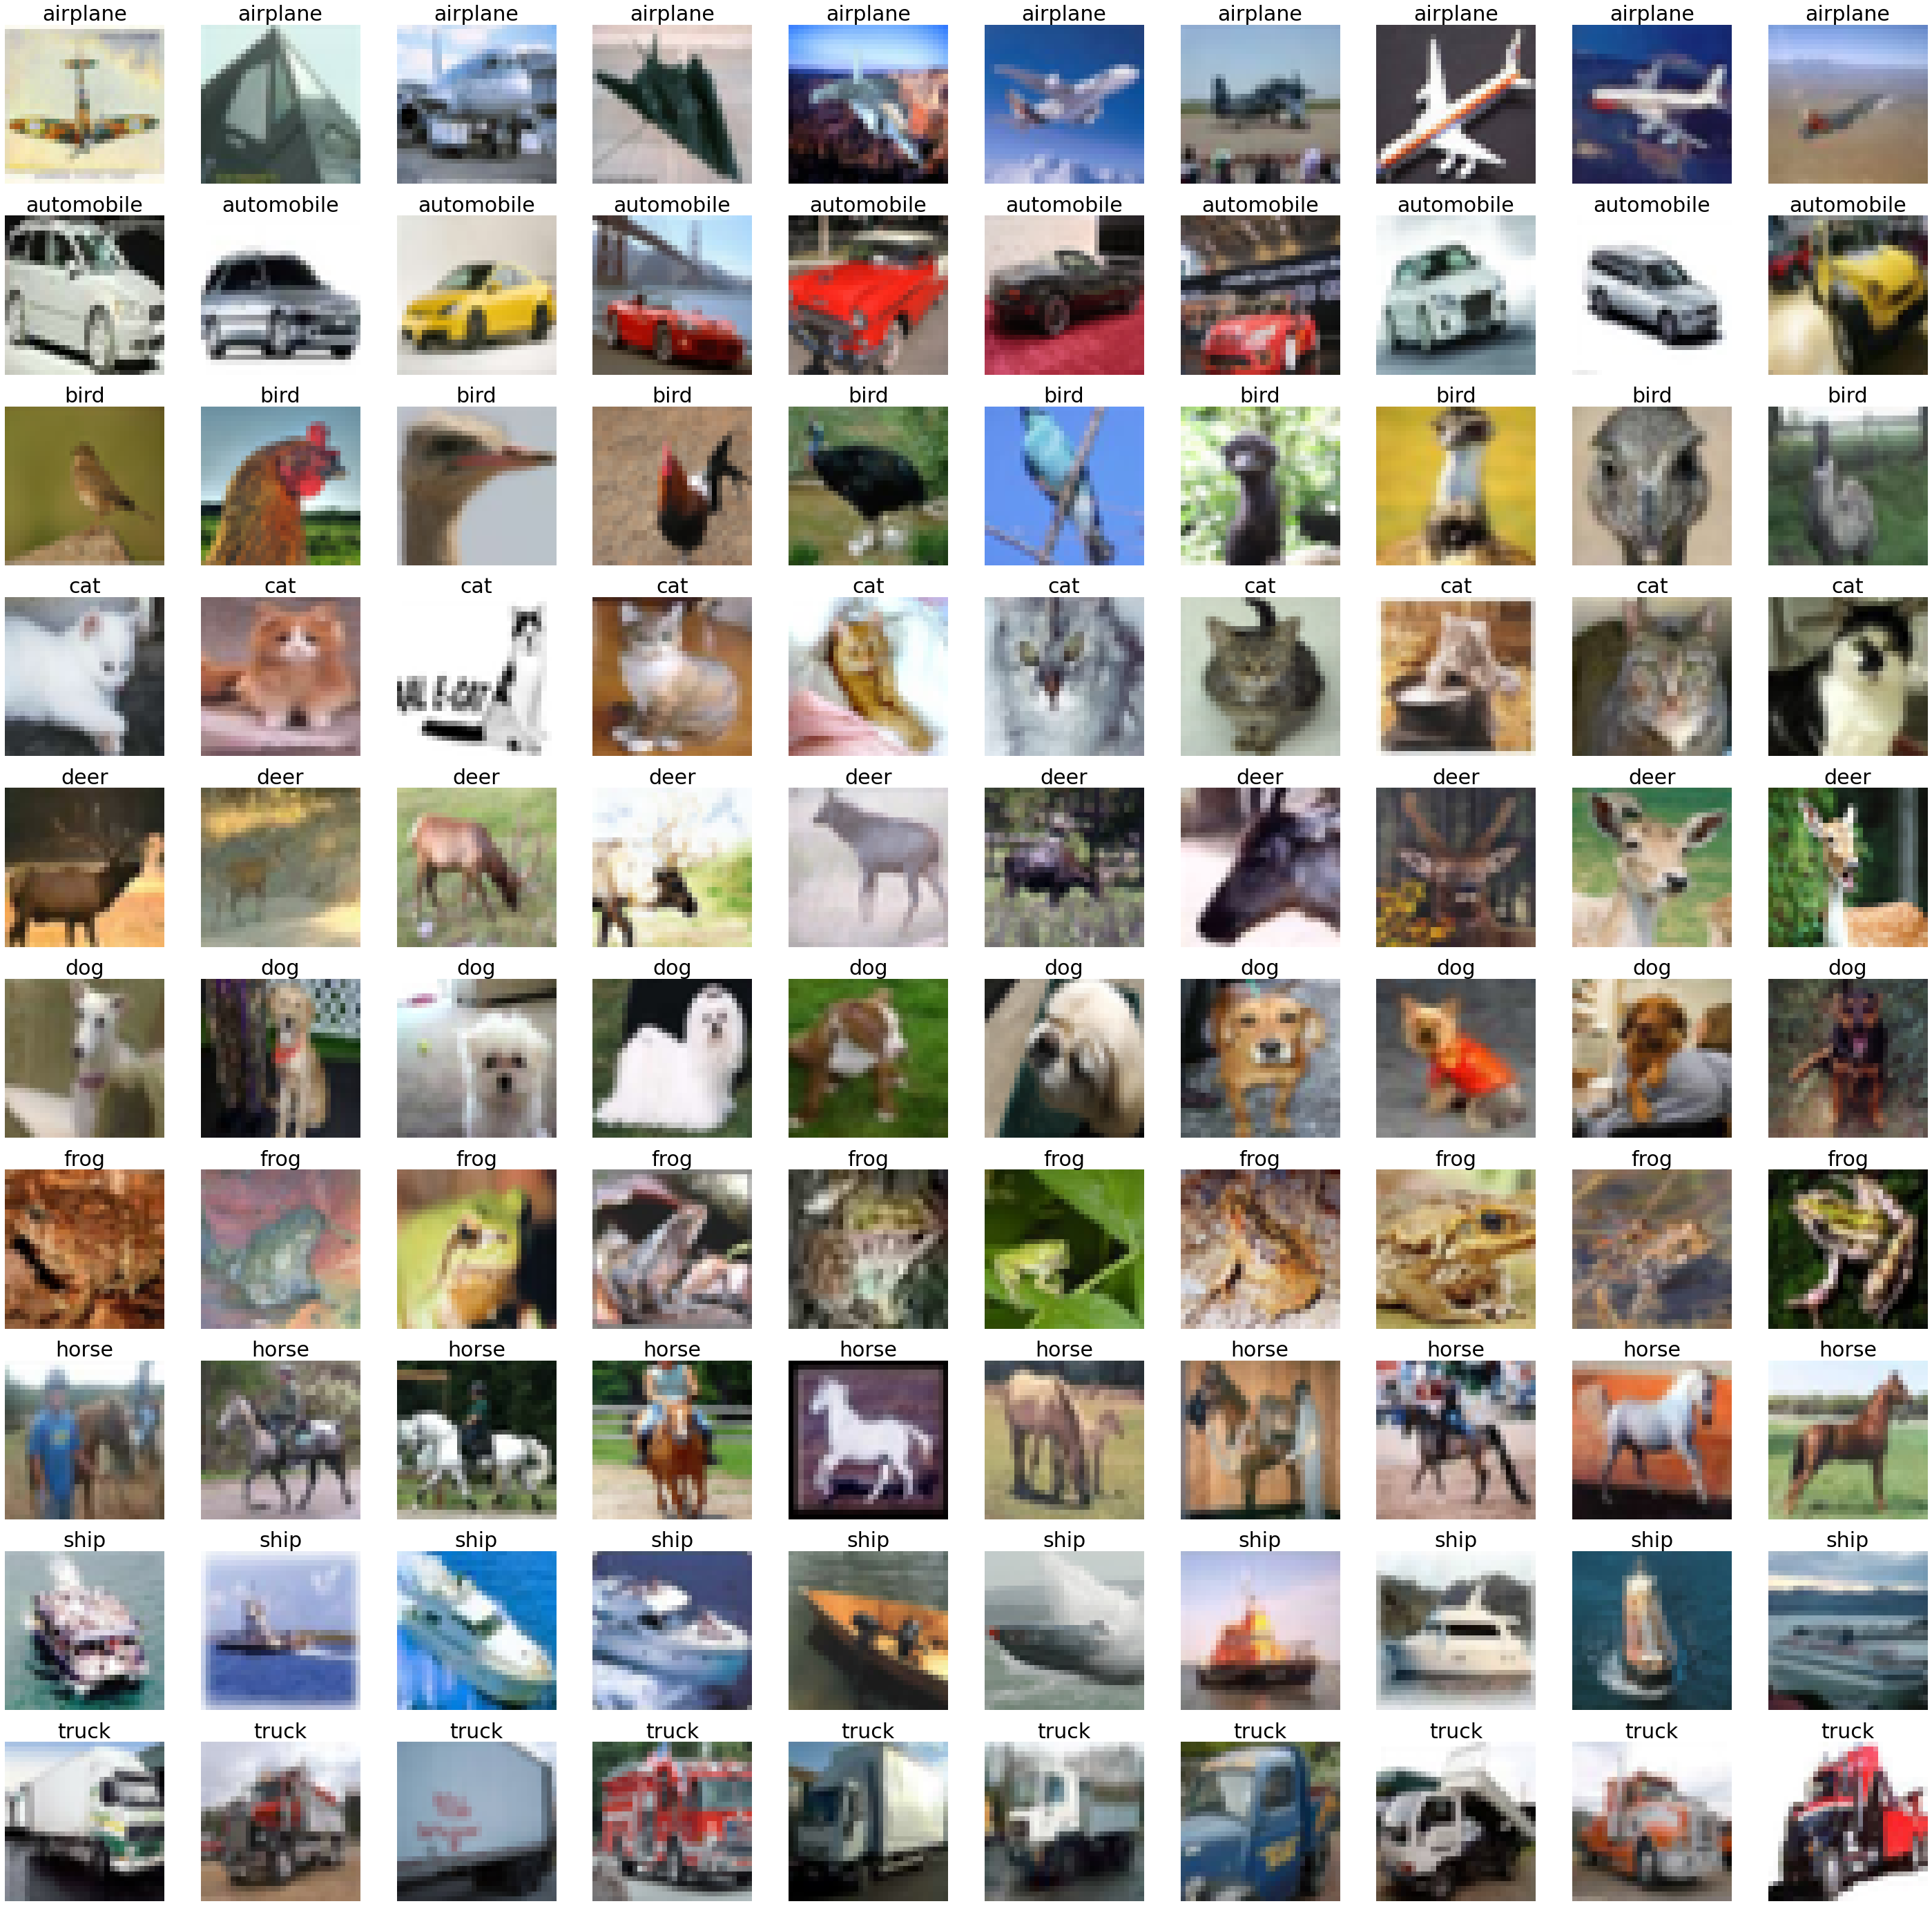

In [ ]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# Create dictionary to group images by their labels
images_by_label = {}
for i in range(len(y_train)):
    label = y_train[i][0]
    if label not in images_by_label:
        images_by_label[label] = []
    images_by_label[label].append(x_train[i])

# Plot images in a 10x10 grid where each row has 10 images with the same label
fig, ax = plt.subplots(10, 10, figsize=(50, 50))
for i in range(10):
    for j in range(10):
        label_images = images_by_label[i]
        image = label_images[j]
        image = image.reshape(32,32,3)
        ax[i][j].imshow(image)
        ax[i][j].set_title(label_names[i] , fontsize = 30)
        ax[i][j].axis('off')
plt.show()

<BarContainer object of 10 artists>

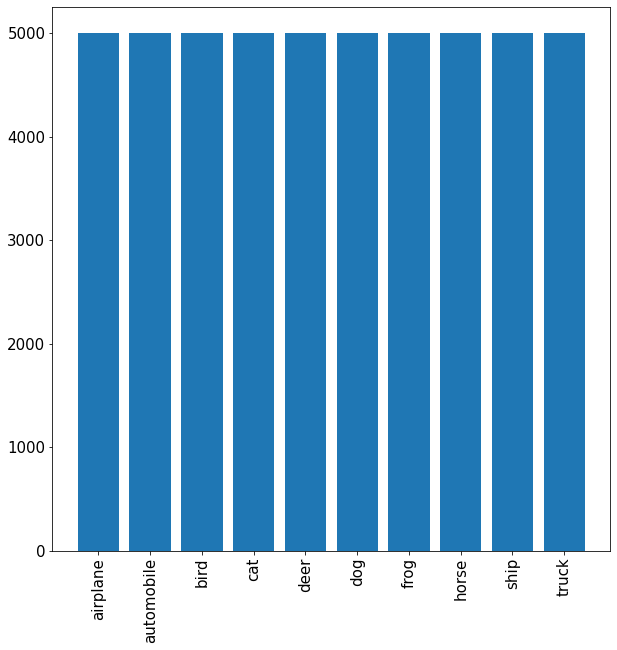

In [ ]:
# Create dictionary to group images by their labels
dict = {k:0 for k in range(10)}
for i in train_labels:
    dict[i[0]] += 1
plt.figure(figsize=(10, 10))
plt.xticks(range(10),fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.bar(label_names, dict.values())

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', name='Layer_1', input_shape=(32 * 32 * 3,)))
network.add(layers.Dense(256, activation='relu', name='Layer_2'))
network.add(layers.Dense(128, activation='relu', name='Layer_3'))
network.add(layers.Dense(10, activation='softmax', name='Output'))

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


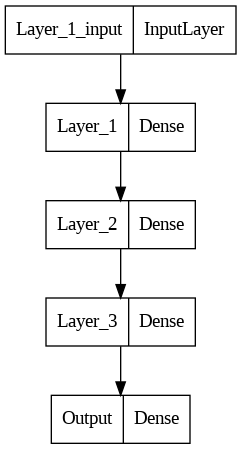

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network)

In [ ]:
network.compile(optimizer='Adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
from sklearn.utils import validation
history = network.fit(x_train,
                      y_train,
                      epochs=20,
                      batch_size=1024 ,
                      use_multiprocessing=True ,
                      validation_data=(x_val,y_val))

Epoch 1/20
40/40 [==============================] - 8s 202ms/step - loss: 1.5629 - accuracy: 0.4446 - val_loss: 1.5934 - val_accuracy: 0.4289
Epoch 2/20
40/40 [==============================] - 6s 145ms/step - loss: 1.5335 - accuracy: 0.4576 - val_loss: 1.6059 - val_accuracy: 0.4270
Epoch 3/20
40/40 [==============================] - 8s 192ms/step - loss: 1.5088 - accuracy: 0.4647 - val_loss: 1.5801 - val_accuracy: 0.4374
Epoch 4/20
40/40 [==============================] - 6s 146ms/step - loss: 1.4832 - accuracy: 0.4747 - val_loss: 1.5348 - val_accuracy: 0.4499
Epoch 5/20
40/40 [==============================] - 7s 175ms/step - loss: 1.4626 - accuracy: 0.4821 - val_loss: 1.5463 - val_accuracy: 0.4468
Epoch 6/20
40/40 [==============================] - 6s 147ms/step - loss: 1.4390 - accuracy: 0.4890 - val_loss: 1.5937 - val_accuracy: 0.4321
Epoch 7/20
40/40 [==============================] - 7s 175ms/step - loss: 1.4322 - accuracy: 0.4924 - val_loss: 1.5414 - val_accuracy: 0.4565
Epoch 

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.3995 - accuracy: 0.5034


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

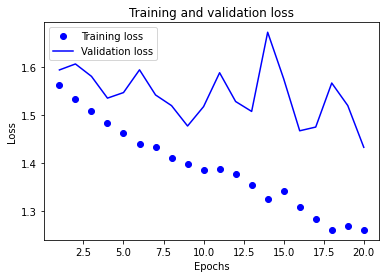

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

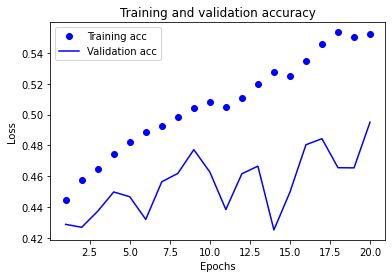

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()